# look at most similar compounds to the ones that were hits for lysosome acidification

In [2]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from atomsci.ddm.pipeline import chem_diversity as cd
from atomsci.ddm.pipeline import dist_metrics as dm
from atomsci.ddm.utils import struct_utils as su
%config Completer.use_jedi=False

In [3]:
df=pd.read_csv('./ChEMBL_kinase_IC50s_nM.csv')
df

,Molecule_ChEMBL_ID,Smiles,CHEMBL279 Vascular endothelial growth factor receptor 2 KDR,CHEMBL203 Epidermal growth factor receptor erbB1 EGFR,CHEMBL2971 Tyrosine-protein kinase JAK2 JAK2,CHEMBL260 MAP kinase p38 alpha MAPK14,CHEMBL5145 Serine/threonine-protein kinase B-raf BRAF,CHEMBL2842 Serine/threonine-protein kinase mTOR MTOR,CHEMBL2835 Tyrosine-protein kinase JAK1 JAK1,CHEMBL2599 Tyrosine-protein kinase SYK SYK,...,"CHEMBL2743 cAMP-dependent protein kinase, gamma catalytic subunit PRKACG",CHEMBL5047 Serine/threonine-protein kinase ULK3 ULK3,CHEMBL5519 Serine/threonine-protein kinase DCLK2 DCLK2,CHEMBL5698 NUAK family SNF1-like kinase 2 NUAK2,CHEMBL3542 Serine/threonine-protein kinase NIM1 NIM1K,CHEMBL5052 Serine/threonine-protein kinase MRCK beta CDC42BPB,CHEMBL4851 Serine/threonine-protein kinase 38-like STK38L,CHEMBL3627582 Testis-specific serine/threonine-protein kinase 6 TSSK6,CHEMBL1163129 Serine/threonine-protein kinase SBK1 SBK1,CHEMBL5520 Casein kinase I isoform alpha-like CSNK1A1L
0,CHEMBL10,C[S+]([O-])c1ccc(-c2nc(-c3ccc(F)cc3)c(-c3ccncc...,NaN,96000.0,NaN,564.916667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CHEMBL100076,COc1cc(Nc2c(C#N)cnc3cc(-c4ccccc4CN4CCOCC4)ccc2...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CHEMBL100079,CCC(CO)Nc1nc(NCc2ccccc2)c2nc(Cl)n(C(C)C)c2n1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CHEMBL100172,COCCOc1cc2c(cc1OC)Nc1ncnc(Nc3cc(OC)c(Cl)cc3Cl)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CHEMBL100174,CCCCN(C)c1ccc(/N=N/c2ncc([N+](=O)[O-])s2)c(C)c1,151.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101699,CHEMBL99803,O=C1Cc2c(n(CCO)c3ccc(Br)cc23)-c2ccccc2N1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101700,CHEMBL99832,COc1cccc(Nc2ncc(-c3ccccc3)s2)n1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101701,CHEMBL99842,CC(=O)Nc1nccc(-c2c(C)nc3ccccn23)n1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101702,CHEMBL99852,Oc1cccc(/C=C/c2cc(O)cc(O)c2)c1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.Smiles.to_csv('./ChEMBL_Kinase_Smiles.txt', index=False, header=False)

In [10]:
smdc=pd.read_csv('smdc_compound_matches.csv')
df = df.merge(smdc, how='inner', left_on='Smiles', right_on='Original_Smiles')
df.shape

(1672, 401)

In [11]:
smdc_ids={
"PP242 972465"  :"CC(C)n1nc(c2cc3cc(O)ccc3[nH]2)c4c(N)ncnc14",
"OSI-027 972531":"COc1cccc2cc([nH]c12)c3nc([C@@H]4CC[C@H](CC4)C(=O)O)n5ncnc(N)c35",
"MLN0128 972600":"CC(C)n1nc(c2ccc3oc(N)nc3c2)c4c(N)ncnc14",
}

In [17]:
smiles_arr1=["CC(C)n1nc(c2cc3cc(O)ccc3[nH]2)c4c(N)ncnc14",
"COc1cccc2cc([nH]c12)c3nc([C@@H]4CC[C@H](CC4)C(=O)O)n5ncnc(N)c35",
"CC(C)n1nc(c2ccc3oc(N)nc3c2)c4c(N)ncnc14",]
smiles_arr1=df.Smiles.tolist()

mols1 = [Chem.MolFromSmiles(s) for s in smiles_arr1]
fprints1 = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, 1024) for mol in mols1]

In [18]:
for name, smiles in smdc_ids.items():
    print(name,smiles)
    cpd_mol = su.base_mol_from_smiles(smiles)
    cpd_fprint = AllChem.GetMorganFingerprintAsBitVect(cpd_mol, 2, 1024)
    df[f'tani sim to {name}']=1-dm.tanimoto_single(cpd_fprint, fprints1)[0]
    # print(1-dm.tanimoto_single(cpd_fprint, fprints1)[0])

PP242 972465 CC(C)n1nc(c2cc3cc(O)ccc3[nH]2)c4c(N)ncnc14
OSI-027 972531 COc1cccc2cc([nH]c12)c3nc([C@@H]4CC[C@H](CC4)C(=O)O)n5ncnc(N)c35
MLN0128 972600 CC(C)n1nc(c2ccc3oc(N)nc3c2)c4c(N)ncnc14


In [19]:
df.columns

Index(['Molecule_ChEMBL_ID', 'Smiles',
       'CHEMBL279 Vascular endothelial growth factor receptor 2 KDR',
       'CHEMBL203 Epidermal growth factor receptor erbB1 EGFR',
       'CHEMBL2971 Tyrosine-protein kinase JAK2 JAK2',
       'CHEMBL260 MAP kinase p38 alpha MAPK14',
       'CHEMBL5145 Serine/threonine-protein kinase B-raf BRAF',
       'CHEMBL2842 Serine/threonine-protein kinase mTOR MTOR',
       'CHEMBL2835 Tyrosine-protein kinase JAK1 JAK1',
       'CHEMBL2599 Tyrosine-protein kinase SYK SYK',
       ...
       'Data', 'CanonicalTautomer', 'NumberOfTautomers', 'Canonical_Smiles',
       'Molecular_Weight', 'SMDC ID', 'TooManyTautomers',
       'tani sim to PP242 972465', 'tani sim to OSI-027 972531',
       'tani sim to MLN0128 972600'],
      dtype='object', length=404)

In [25]:
sims=df[['Molecule_ChEMBL_ID', 'Smiles', 'tani sim to PP242 972465', 'tani sim to OSI-027 972531',
       'tani sim to MLN0128 972600']].sort_values('tani sim to PP242 972465', ascending=False)
sims2=pd.DataFrame({'Molecule_ChEMBL_ID':['PP242 972465', 'OSI-027 972531', 'MLN0128 972600'],
             'Smiles':["CC(C)n1nc(c2cc3cc(O)ccc3[nH]2)c4c(N)ncnc14","COc1cccc2cc([nH]c12)c3nc([C@@H]4CC[C@H](CC4)C(=O)O)n5ncnc(N)c35","CC(C)n1nc(c2ccc3oc(N)nc3c2)c4c(N)ncnc14",], 
             'tani sim to PP242 972465':[1.,0.26190476, 0.48333333],
             'tani sim to OSI-027 972531':[0.26190476, 1.,0.17045455],
             'tani sim to MLN0128 972600':[0.48333333, 0.17045455, 1.]})
sims=pd.concat([sims,sims2])
sims.sort_values('tani sim to OSI-027 972531', ascending=False)
sims.sort_values( 'tani sim to MLN0128 972600', ascending=False)
# sims

,Molecule_ChEMBL_ID,Smiles,tani sim to PP242 972465,tani sim to OSI-027 972531,tani sim to MLN0128 972600
2,MLN0128 972600,CC(C)n1nc(c2ccc3oc(N)nc3c2)c4c(N)ncnc14,0.483333,0.170455,1.000000
118,CHEMBL1241674,CC(C)n1nc(-c2cc3cc(O)ccc3[nH]2)c2c(N)ncnc21,1.000000,0.261905,0.483333
0,PP242 972465,CC(C)n1nc(c2cc3cc(O)ccc3[nH]2)c4c(N)ncnc14,1.000000,0.261905,0.483333
892,CHEMBL306380,Cc1ccc(-c2nn(C(C)(C)C)c3ncnc(N)c23)cc1,0.316667,0.162500,0.407407
1197,CHEMBL406845,CC(C)(C)n1nc(-c2ccc(Cl)cc2)c2c(N)ncnc21,0.306452,0.158537,0.392857
...,...,...,...,...,...
1622,CHEMBL75880,C1CCC(C(CC2CCCCN2)C2CCCCC2)CC1,0.044776,0.063291,0.015152
126,CHEMBL125,CCCCCCCCCCCCCCCCOP(=O)([O-])OCC[N+](C)(C)C,0.027778,0.060241,0.014286
1069,CHEMBL372764,CCCCCCCCCCCCCCCCCCOP(=O)([O-])OC1CC[N+](C)(C)CC1,0.038961,0.105882,0.013158
1605,CHEMBL69710,[Cl-].[Li+],0.000000,0.000000,0.000000


In [31]:
sims.to_csv('smdc_tanimoto_similarities_to_3_hits.csv')

In [32]:
similarities=['PP242 972465', 'OSI-027 972531', 'MLN0128 972600', 'CHEMBL2069946','CHEMBL3655253','CHEMBL3798574']
similarities=['PP242 972465', 'OSI-027 972531', 'MLN0128 972600', 'CHEMBL1241767','CHEMBL1471674','CHEMBL306380']
mols=[]
labs=['PP242 972465', 'OSI-027 972531', 'MLN0128 972600', 'CHEMBL2069946 (0.73)','CHEMBL3655253 (0.53)','CHEMBL3798574 (0.75)']
labs=['PP242 972465', 'OSI-027 972531', 'MLN0128 972600', 'CHEMBL1241767 (0.32)','CHEMBL1471674 (0.28)','CHEMBL306380 (0.41)']

for sim in similarities:
    tempdf=sims[sims.Molecule_ChEMBL_ID==sim]
    mols.append(Chem.MolFromSmiles(tempdf.Smiles.values[0]))

In [33]:
from rdkit.Chem import Draw
from rdkit.Chem.rdFMCS import FindMCS

In [34]:
template=mols[0]
tempmols=mols
AllChem.Compute2DCoords(template)
mcs = FindMCS(tempmols, 
              completeRingsOnly=False, 
              ringMatchesRingOnly=False, 
              timeout=10)
patt = Chem.MolFromSmarts(mcs.smartsString)
template_match = template.GetSubstructMatch(patt)
for mol in tempmols:
    query_match = mol.GetSubstructMatch(patt)
    AllChem.Compute2DCoords(mol)
    rms = AllChem.AlignMol(mol, template, atomMap=list(zip(query_match,template_match)))

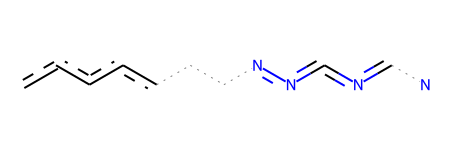

In [35]:
patt

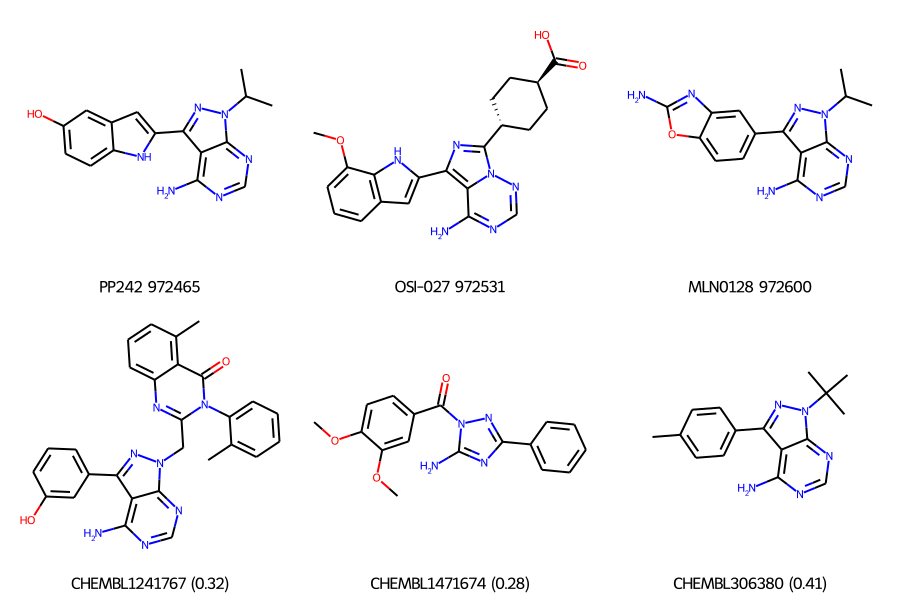

In [36]:
Draw.MolsToGridImage(mols,legends=labs, subImgSize=(300,300), useSVG=True)

# create plate map from list

In [5]:
df=pd.read_excel('/mnt/z/SMDC/All_Compounds/Compound Library (ATOM - Otava PARP1 targeted)/Otava_384w_edit.xlsx', engine='openpyxl')
df.columns

Index(['COMPOUND_ID', 'BRUTTO_FORMULA', 'MOLWEIGHT', 'ANALYTICAL_METHOD',
       'ANALYTICAL_RESULT', 'ANALYTICAL_DATE', 'CHEMICAL_NAME', 'LOT_NUMBER',
       'QUANTITY_mg', 'PLATE_NUMBER', 'RACK_POSITION', 'SMILES',
       'QUANTITY_umol', 'Exact_Volume_uL', 'LIBRARY_NAME', 'IC_SMILES',
       'IC_INCHI', 'IC_INCHI_KEY', 'LOT_NUM_COUNT', 'IC_ID', 'IC_COMPOUND_ID',
       'ICH_ID', 'PLATE_WELL_ID', 'ICL_LOT_NUM', 'ICL_IV_ID', 'ICL_ILT_ID',
       'ICL_ALIAS', 'ICL_SCREENING_CENTER', 'ICL_ICO_ID', 'ICL_VEN_COLLECTION',
       'ICL_IAT_ID', 'ICL_ID', 'SALTDATA', 'ICL_SALT', 'ICL_SALT_NUM'],
      dtype='object')

In [10]:
df['Row']=df.RACK_POSITION.str.slice(start=0, stop=1)
df['Col']=df.RACK_POSITION.str.slice(start=1).astype(int)

0       3
1       4
2       5
3       6
4       7
       ..
451    15
452    16
453    17
454    18
455    19
Name: Col, Length: 456, dtype: int64

In [14]:
df[df.PLATE_NUMBER==56].pivot_table(index='Row', columns='Col', values='IC_ID').to_csv('/mnt/z/SMDC/All_Compounds/Compound Library (ATOM - Otava PARP1 targeted)/OTPARP56_plate_map.csv')